In [1]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [2]:
pd.Series()

<ipython-input-2-fa15c544da3b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [3]:
x1 = pd.Series([2, 4, 6, 8, 10])
x2 = pd.Series([1, 3, 5, 7, 10])
print(x1 + x2)
print(x1 - x2)
print(x1 * x2)
print(x1 / x2)

0     3
1     7
2    11
3    15
4    20
dtype: int64
0    1
1    1
2    1
3    1
4    0
dtype: int64
0      2
1     12
2     30
3     56
4    100
dtype: int64
0    2.000000
1    1.333333
2    1.200000
3    1.142857
4    1.000000
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [4]:
x1 = pd.Series([2, 4, 6, 8, 10])
x2 = pd.Series([1, 3, 5, 7, 10])

print(x1==x2)
print(x1<x2)
print(x1>x2)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [5]:
def change_dtype(series):
    return pd.to_numeric(series, errors = 'coerce')

series = pd.Series([1,2,'Python', 2.0, True, 100])
change_dtype(series)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

In [6]:
ipl = pd.read_csv('/content/batsman_runs_series.csv', index_col='batter').squeeze('columns')
ipl

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

###`Q-6` Find top 10 most run getter from the series.

In [7]:
ipl.sort_values(ascending=False).head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

###`Q-7` No of players having runs above 3000

In [8]:
ipl[ipl > 3000].count()

20

###`Q-8` No of players having runs above mean value?

In [9]:
ipl[ipl > ipl.mean()].count()

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [10]:
items = pd.read_csv('/content/items.csv', index_col='item_name').squeeze('columns')

In [11]:
items.isnull().sum()

50

In [12]:
items.info()

<class 'pandas.core.series.Series'>
Index: 4622 entries, Chips and Fresh Tomato Salsa to Chicken Salad Bowl
Series name: item_price
Non-Null Count  Dtype 
--------------  ----- 
4572 non-null   object
dtypes: object(1)
memory usage: 72.2+ KB


In [13]:
def convert(x):
  if isinstance(x,str):
    y = x[1:]
  else:
    y = x
  return float(y)*82.49

In [14]:
items = items.apply(convert)

In [15]:
items.info()

<class 'pandas.core.series.Series'>
Index: 4622 entries, Chips and Fresh Tomato Salsa to Chicken Salad Bowl
Series name: item_price
Non-Null Count  Dtype  
--------------  -----  
4572 non-null   float64
dtypes: float64(1)
memory usage: 72.2+ KB


In [16]:
items.fillna(items.mean(), inplace=True)

In [17]:
items.isnull().sum()

0

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [18]:
items.mean()

615.6254681102363

In [19]:
items.count()*0.3

1386.6

In [20]:
items.sort_values().iat[1386]

367.0805

In [21]:
items.quantile(q=0.3)

367.0805

In [22]:
items.count()*0.06

277.32

In [23]:
items.sort_values().iat[277]

103.1125

In [24]:
items.quantile(q=0.06)

103.1125

<Axes: ylabel='Frequency'>

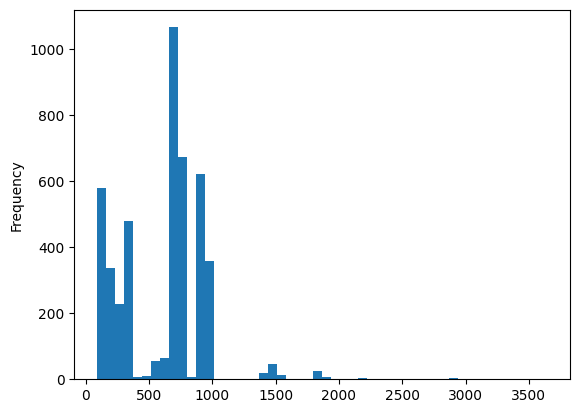

In [25]:
items.plot(kind='hist', bins=50)

In [26]:
((items>1000) & (items<2000)).sum()

116

In [27]:
items.between(1000,2000).sum()

116